## Building a Machine Learning Classification Model to Predict Customer Churn

* Student: Wambui Munene
* Student pace: DSPT08
* Scheduled project review date/time: 23/12/2024
* Instructor name: Samuel Karu

### Introduction

The telco industry is highly competitive with multiple players within any given jurisdiction. Acquiring new customers involves huge marketing costs, that include huge advertising budgets and commissions to sales agents. It therefore becomes imperative to retain those customers once they are acquired. Churn which is refers to the number of customers who cease doing business with a company within a given period, is a closely watched metric in the telco industry. It is the motivation of every telco company to understand the features or characteristics of a customer who is likely to 'churn'. With this understanding, the company can get ahead of the problem, and develop initiatives that target these specific customers , to discourage them from ceasing doing business with the company.

In this project, I will use a dataset from SyriaTel that is avialble on https://www.kaggle.com/ that details various call patterns and spend of customers as well as their locations https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset .

Using this data set I will:
+ Examine the features and using domain knowledge select the features to use in my predictive model
+ Using these features build a classifier to predict whether a customer will stop doing business with SyriaTel
+ Based on the model metrics, determine if these features have any predictive patterns
+ If the features indeed have predictive patterns, use the most optimal version of the model to test customer data and identify those customers that are most likely to churn
+ The company will then use this predicted data to make proactice startegies to retain these 'at risk' customers


### Problem Statement
SyriaTel is intentional about reducing the cost of customer churn. They have hired me to develop a classification model that is able to a higher degree, predict if a customer is likely to churn i.e. terminate their contract. They have provided me with a historical dataset of customer call and spend characteristics and whether or not they left the network after a period of time. With the model model their Marketing and Revenue Assurance departments will be able to test future customer data to predict the likelihood of a customer leaving the network. With these predictions, they will be able to develop retention startegies specifically targeted to these customers to discourage them from leaving.


    
 ### Business Objectives
 + **Goal:**
     + Train a classification model using the provided historical data to determine if and what features are useful in predicting churn.
 + **Specific Objectives:**
     + Determine if the data provided has any predictive power on the target using Logistic regression or decision trees.
     + Through model optimization, identify the features that have the best predictive power 
     + Use the model on future customer data to predict "at risk" customers
     + Provide insights on factors affecting customer churn and suggest approriate remedies
     
     
 

### 1. 0 Industry Background

The SyriaTel data set consist of fairly straightforward and well formated data. It has critical customer usage (minutes/number of calls) as well as customer behavior columns. Based on **industry standards** the following features from the data set are commonly associated with customer churn and will be considered as model features that have an impact on the traget variable 'churn'.

**Usage Patterns:** 'total day minutes', 'total day calls','total eve calls', 'total eve minutes','total night calls','total night minutes','total intl calls', and 'total intl minutes' are critical columns for determining churn. High usage of calls and minutes can indicate customer engagement and satisfaction, while low usage might suggest dissatisfaction.

**Charges:** 'total day charge','total eve charge','total night charge', and 'total intl charge' are also important columns. Higher charges can lead to customer distasfaction if they feel they are not getting value for money.

**Service Quality:** Features like 'International plan' and 'voice mail plan' can reflect a very high expectation from customers who are enrolled in those plans, and can have a direct impact on satisfaction levels and therefore, churn.

**Customer Support:** 'customer service calls' a high number of customer service calls can indicate issues of service quality or customer dissatisfaction.

**Account Length:** The 'account length' feature is equally important as longer account lengths generally indicate customer loyalty, while shorter account lengths may suggest a higher likelihood of churn.

The following features from the data set are deemed to have little or no predicted power and will be excluded from the model:

+ 'state'
+ 'area code'
+ 'phone number'


### 2.0 Understanding the Dataset

In [1]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Load the data as a DataFrame and display the first 5 columns
df = pd.read_csv('telco_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# check the shape of the data
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 3333 rows
This data set consists of 21 columns


In [4]:
# Get column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

The dataset has 21 columns that can be categorized as follows:-
+ **Customer Info:** These clolumns are state, account length(the period when the account has been active), area code, phone number and account length 
* **international plan:** This is a binary column (Yes/No) that indicates whether a customer is enrolled for international calls
+ **voice mail plan:** This is also a binary column (Yes/No) that indicates whether a customer has enrolled into the Voice Mail service
+ **number vmail messages:** This is the number of voice mail messages the customer has received
+ **Minutes Info :** These are the number of  minutes by each customer with different columns for local day, evening,night minutes, as well as total international minutes
+ **Call Info:** These are the number of local calls by each customer with different columns for  into day, evening,and night calls, as well as total international calls
+ **Charges Info:** These are the charges for local calls made by each customer with different columns for day, evening and night charges, as well as total international charges.
+ **customer service calls:** These are the number of calls customers made to customer service
+ **churn:** This is a binary column indicating whether or not a customer left the network service. It is our target column.

In [5]:
# Get column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The target column is boolean. This will be converted to integer. The internation plan and voice mail plan columns are objects and these will be one-hot encoded to integers for modeling. There are no missing values in this dataset.

In [6]:
# confirming there are no Null values
df.isnull().values.any()

False

In [7]:
# Get statistical summary of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [8]:
# Get statistical summary of the categorical columns
df.describe(include='O').T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,382-4657,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


The 'international plan' and 'voice mail plan' columns are binary columns(Yes/No). These will be One-Hot-Encoded and converted to integers.

### 2.1 Data Cleaning and Feature Engineering

In this section I will perform the following tasks:
+ Drop columns that are not critical to the model
+ Convert column names to CamelCase for easier readability and display
+ Convert the target column 'churn' from boolean to integer
+ Convert the 2 categorical columns 'international plan'and 'voice mail plan' to numerical
+ Check for, and remove outliers

In [9]:
# Making a copy of the DataFrame before we clean
df1 = df.copy(deep=True)
df1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
# drop unimportant columns

df1 = df1.drop(columns=['phone number','area code'],axis=1)
df1.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [11]:

# Function to capitalize the first letter of each word in column names
def capitalize_columns(df):
    df1.columns = [' '.join(word.capitalize() for word in col.split()) for col in df1.columns]
    return df1

# Apply the function to the DataFrame
df1 = capitalize_columns(df1)
                   
#Apply the function to the DataFrame 
df1 = capitalize_columns(df1) 

df1.columns


Index(['State', 'Account Length', 'International Plan', 'Voice Mail Plan',
       'Number Vmail Messages', 'Total Day Minutes', 'Total Day Calls',
       'Total Day Charge', 'Total Eve Minutes', 'Total Eve Calls',
       'Total Eve Charge', 'Total Night Minutes', 'Total Night Calls',
       'Total Night Charge', 'Total Intl Minutes', 'Total Intl Calls',
       'Total Intl Charge', 'Customer Service Calls', 'Churn'],
      dtype='object')

In [12]:
#Function to remove the white spaces from column names
def remove_spaces(df1): 
    df1.columns = [col.replace(' ', '') for col in df1.columns]
    return df1
                   
#Apply the function to the DataFrame 
df1 = remove_spaces(df1) 

# Display the updated DataFrame columns
df1.head()

,State,AccountLength,InternationalPlan,VoiceMailPlan,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,TotalNightCharge,TotalIntlMinutes,TotalIntlCalls,TotalIntlCharge,CustomerServiceCalls,Churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df1.columns

Index(['State', 'AccountLength', 'InternationalPlan', 'VoiceMailPlan',
       'NumberVmailMessages', 'TotalDayMinutes', 'TotalDayCalls',
       'TotalDayCharge', 'TotalEveMinutes', 'TotalEveCalls', 'TotalEveCharge',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalNightCharge',
       'TotalIntlMinutes', 'TotalIntlCalls', 'TotalIntlCharge',
       'CustomerServiceCalls', 'Churn'],
      dtype='object')

In [14]:

# # OneHotCode the two categorical columns of interest

df1 = pd.get_dummies(df1, columns=['InternationalPlan','VoiceMailPlan','State'],drop_first=True)

# Convert the one-hot encoded columns and the target colum 'Churn' from boolean to integer 
for col in df1.columns: 
    if df1[col].dtype == 'bool':
          df1[col] = df1[col].astype(int) 
        
df1.head()

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Preview the DataFrame

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AccountLength          3333 non-null   int64  
 1   NumberVmailMessages    3333 non-null   int64  
 2   TotalDayMinutes        3333 non-null   float64
 3   TotalDayCalls          3333 non-null   int64  
 4   TotalDayCharge         3333 non-null   float64
 5   TotalEveMinutes        3333 non-null   float64
 6   TotalEveCalls          3333 non-null   int64  
 7   TotalEveCharge         3333 non-null   float64
 8   TotalNightMinutes      3333 non-null   float64
 9   TotalNightCalls        3333 non-null   int64  
 10  TotalNightCharge       3333 non-null   float64
 11  TotalIntlMinutes       3333 non-null   float64
 12  TotalIntlCalls         3333 non-null   int64  
 13  TotalIntlCharge        3333 non-null   float64
 14  CustomerServiceCalls   3333 non-null   int64  
 15  Chur

All the columns are now numerical. The columns are now 68 from 21 due to the additional columns from the One-Hot-Encoding 

In [16]:
def remove_outliers(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    
    return df1

# List of columns to check for outliers (excluding 'Churn')
feature_columns = [col for col in df1.columns if col != 'Churn' and df1[col].dtype in [np.int64, np.float64]]

# Apply the function to remove outliers
df2 = remove_outliers(df1, feature_columns)
df2

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,0,0,0,0,0,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,0,0,0,0,0,0,1,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,0,0,0,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# check the shape of the data after removing outliers
df2.shape
print(f"This data set consists of {df2.shape[0]} rows")
print(f"This data set consists of {df2.shape[1]} columns")

# The number of rows have reduced from 3333 to 2797.

This data set consists of 2797 rows
This data set consists of 68 columns


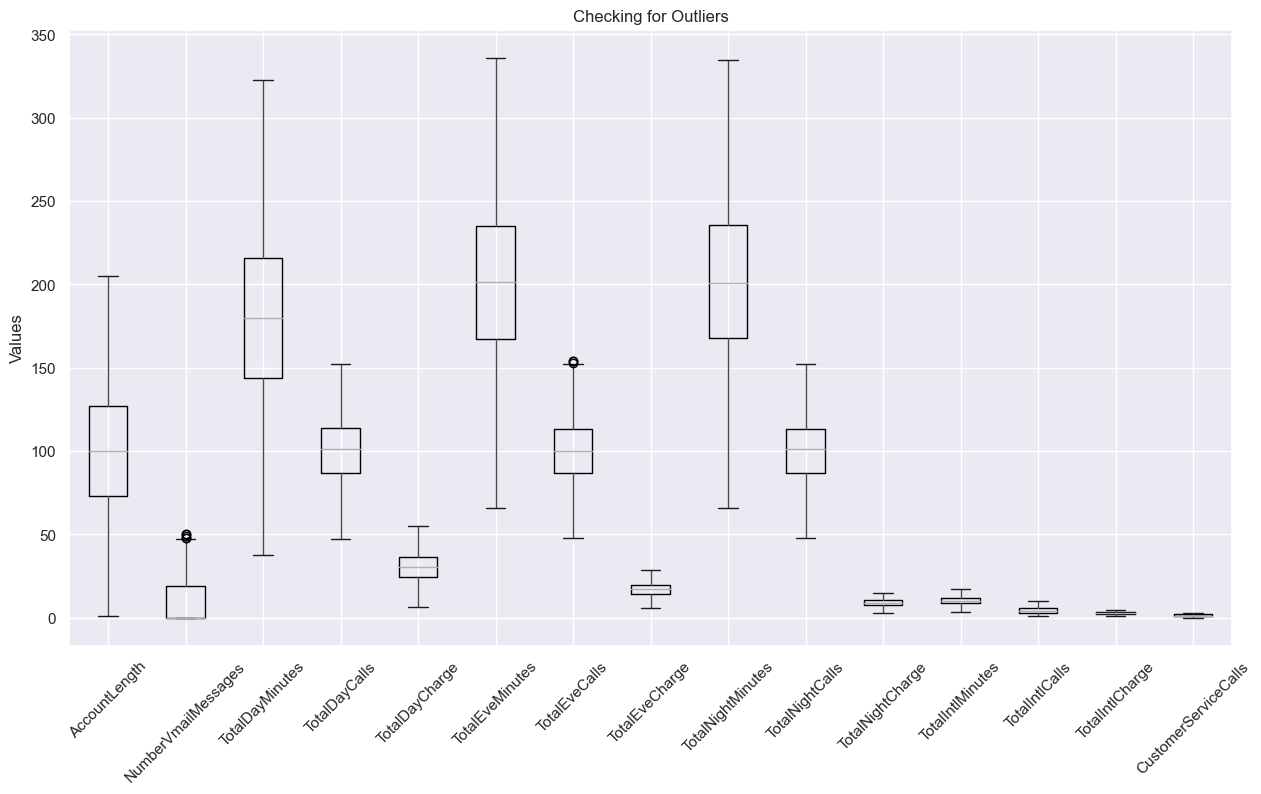

In [18]:
# Generate boxplots for cleaned columns to confirm outliers have been dropped
plt.figure(figsize=(15,8))
df2.boxplot(feature_columns, boxprops=dict(linewidth=1 ))
plt.title('Checking for Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)

                          
plt.show();

# No values outside the IQR showing outliers have been removed

The outliers are now eliminated, and the columns are cleaned; we can go ahead and start EDA. But first we save the clean dataframe to a CSV and make a copy of the same.

In [19]:
# save the clean dataframe in csv format
df2.to_csv('telco_churn_clean.csv',index=False)

In [20]:
# create a copy of the clean dataframe
df2=df2.copy(deep=True)

### 2.2 Exploratory Data Analysis

I will perform various univariate, bivariate and multivariate data analysis to better understand the data, These will include:-

+ **Summary Statistics:** To get a quick overview of the central tendency and dispersion of the dataset's distribution.
+ **Correlation Matrix:** To understand the relationships between nemerical features
+ **Histograms:** To understand numerical features distributions
+ **Class Distribution:** Analyze the distribution of the target variable churn



In [21]:
# Load the clean dataset and create a new dataframe
data = pd.read_csv('telco_churn_clean.csv')
data.head()

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
4,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(data.columns) 

print("\nThis data set consists of {} rows".format(data.shape[0])) 
print("\nThis data set consists of {} columns".format(data.shape[1]))

Index(['AccountLength', 'NumberVmailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalDayCharge', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalEveCharge', 'TotalNightMinutes', 'TotalNightCalls',
       'TotalNightCharge', 'TotalIntlMinutes', 'TotalIntlCalls',
       'TotalIntlCharge', 'CustomerServiceCalls', 'Churn',
       'InternationalPlan_yes', 'VoiceMailPlan_yes', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State

The number of columns have increased exponetially because of one-hot encoding the State columns which has many unique values

#### 2.2.1 Summary Statistics

In [23]:

# Get descriptive statistics for the non-binary nemeric columns
desc_columns = data[['AccountLength','NumberVmailMessages','TotalDayMinutes','TotalDayCalls','TotalDayCharge',
                   'TotalEveMinutes','TotalEveCalls','TotalEveCharge','TotalNightMinutes','TotalNightCalls',
                    'TotalNightCharge','TotalIntlMinutes','TotalIntlCalls','TotalIntlCharge','CustomerServiceCalls']]


desc_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountLength,2797.0,100.392206,39.329033,1.00,73.00,100.00,127.00,205.00
NumberVmailMessages,2797.0,8.131212,13.707224,0.00,0.00,0.00,19.00,50.00
TotalDayMinutes,2797.0,179.995817,52.589516,37.70,144.00,179.80,216.00,322.50
TotalDayCalls,2797.0,100.577047,19.284581,47.00,87.00,101.00,114.00,152.00
TotalDayCharge,2797.0,30.599828,8.940156,6.41,24.48,30.57,36.72,54.83
TotalEveMinutes,2797.0,201.288059,49.042830,66.00,167.20,201.40,235.10,336.00
TotalEveCalls,2797.0,100.020379,19.225656,48.00,87.00,100.00,113.00,154.00
TotalEveCharge,2797.0,17.109714,4.168704,5.61,14.21,17.12,19.98,28.56
TotalNightMinutes,2797.0,201.175366,48.827301,65.70,167.60,201.10,235.80,334.70
TotalNightCalls,2797.0,100.047193,19.052069,48.00,87.00,101.00,113.00,152.00


The summary statistics show some variability in the local  minutes/calls as well as in voicemail messages. The number of Customer service calls made are surprisingly not many, with the maximum number of calls being 3.

#### 2.2.2 Correlation Matrix

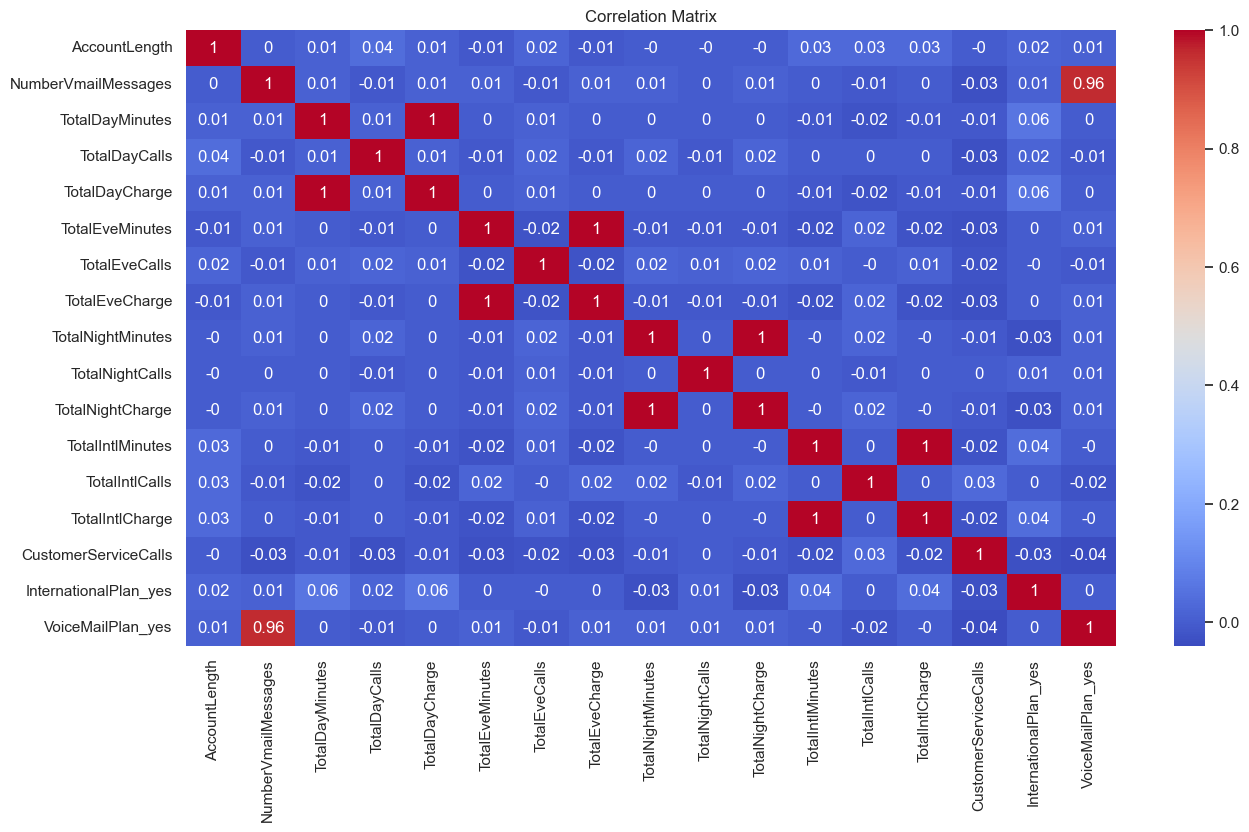

In [24]:
# Calculate the correlation matrix
corr_matrix_columns = data[['AccountLength','NumberVmailMessages','TotalDayMinutes','TotalDayCalls','TotalDayCharge',
                   'TotalEveMinutes','TotalEveCalls','TotalEveCharge','TotalNightMinutes','TotalNightCalls',
                    'TotalNightCharge','TotalIntlMinutes','TotalIntlCalls','TotalIntlCharge','CustomerServiceCalls',
                    'InternationalPlan_yes','VoiceMailPlan_yes']]
corr_matrix = corr_matrix_columns.corr().round(2)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()


Not surprisingly, the total (day,evening,night international) minutes have a perfect linear relationship with the total(day,evening,night,international) charges. This is because charges are based on minutes. Being on a voice plan is also very correlated to the number of voice mail minutes. This **multicollinearity** can impact model performance and interpretability. Highly correlated predictors can contribute to overfitting where the model performs well on training data but poorly on unseen data.  Proposed remedy is to drop one of the correlated predictors form the model.

#### 2.2.3 Histograms

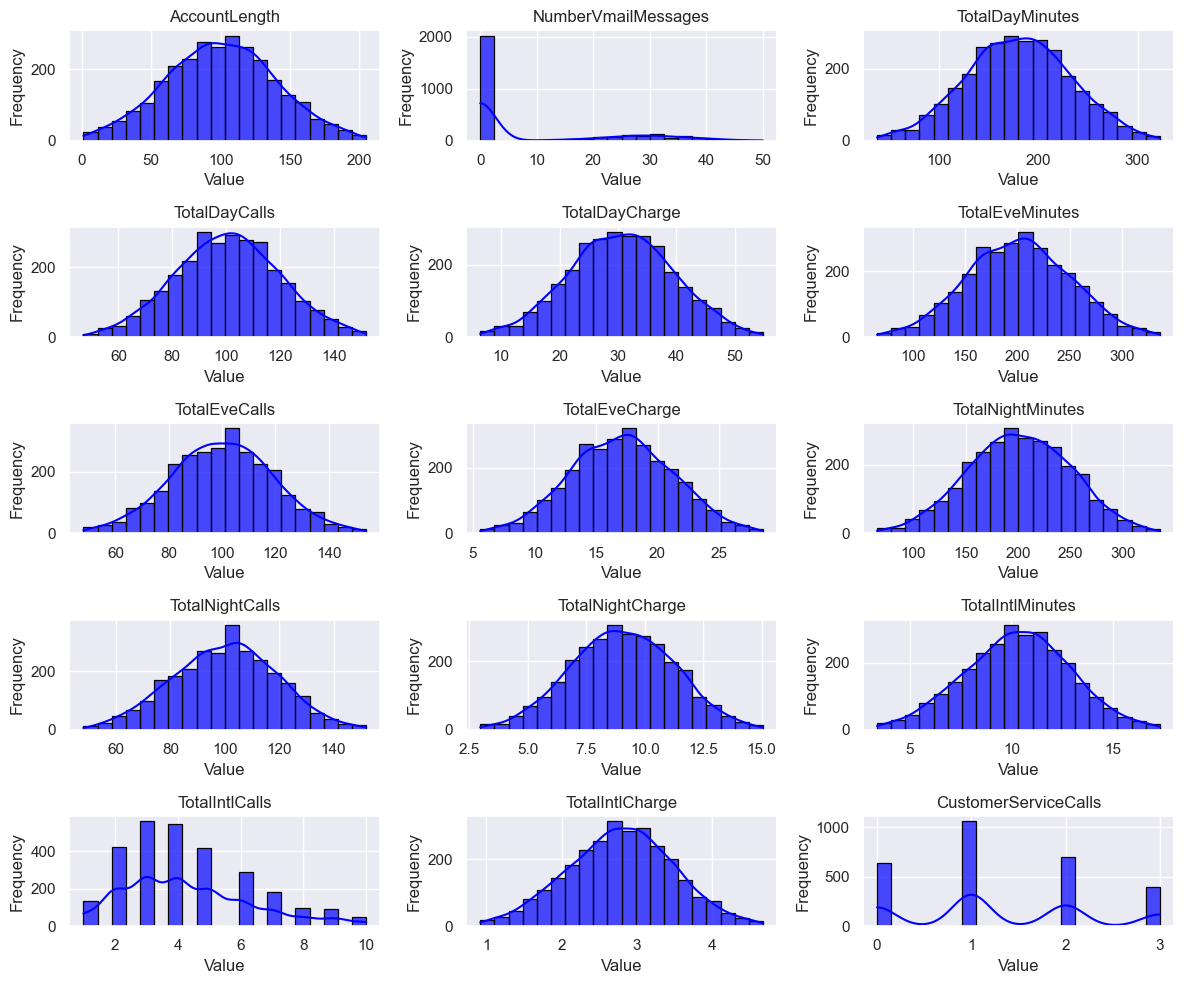

In [25]:
# List of continous columns to plot
continous_cols = data[['AccountLength','NumberVmailMessages','TotalDayMinutes','TotalDayCalls','TotalDayCharge',
                   'TotalEveMinutes','TotalEveCalls','TotalEveCharge','TotalNightMinutes','TotalNightCalls',
                    'TotalNightCharge','TotalIntlMinutes','TotalIntlCalls','TotalIntlCharge','CustomerServiceCalls']]

# Create subplots                               
plt.figure(figsize=(12,10))

for i,col in enumerate (continous_cols):
    plt.subplot(5,3,i+1)
    sns.histplot(data[col],bins=20,kde=True,color='blue',alpha=0.7,edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

The charts show that the number of calls and charges for local calls are approximately normally distributed; International calls distribution is right-skwed with most values concentrated around 4 and a few extending to 10; The total international charge distribution is approximately normal. The Customer Service Calls show distinct peaks at 1,2,3, indicating that these values are more frequent. Number of Voice Mail Messages is highly skewed to the right, with most values concentrated around 0 and a few exceeding 50. 

#### 2.2.4 Class distribution of the target variable

In [26]:
# Check the value counts of the target variable

print(data['Churn'].value_counts())
print(data['Churn'].value_counts(normalize=True))

Churn
0    2493
1     304
Name: count, dtype: int64
Churn
0    0.891312
1    0.108688
Name: proportion, dtype: float64


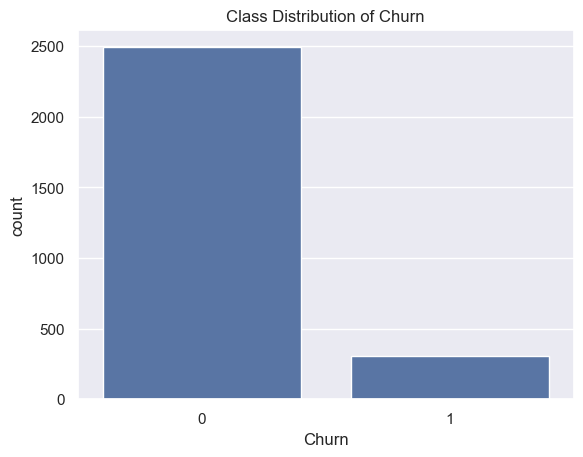

In [27]:
# Plot the classes
sns.countplot(x='Churn', data=data)
plt.title('Class Distribution of Churn')
plt.show()


The output indicates that 89% of the customers did not leave while 11% left. This is significant class imbalance. This can significantly affect impact the reliability of the model in the following ways:-
+ **Bias:** A model trained on imbalanced data may become biased biased toward the majority class. The bias may lead to a high accuracy score, but fail to correctly predict the minority class.
+ **Poor Performance on Minority Class:** Where detecting the minority class is of critical class, like in our model, the model may have poor performance in detecting the minoity class i.e. incorrectly fail to predict churn.

I will address the class problem using **SMOTE** (Synthetic Minority Over-Sampling Technique) an oversampling technique that increases the number of instances in the minority class during the modeling process below.

### 4.0 Modeling

In this section I will follow a model iteration plan that addresses class imbalance and leverages feature importance and hyperparameters tuning. The following is a step by step plan to build and improve the model, starting with a base logistic model and incorporating SMOTE for oversampling, Random Forest for feature selection,and GridSearchCV for hyperparameter tuning:-

+ **Data Preparation:** In this section, I will prepare the data for modeling. Since I have alredy handled data cleaning and one-hot encoding, I will address multicollinearity. I will use the correlation matrix in section 2.2.2 above and remove highly correlated features.
+ **Baseline Logistic Regression Model:** I will split the data into training and test sets, train the logistic regression model on the training data and evaluate the baseline model using appropriate metrics.
+ **Handle Class Imbalance:** I will use **SMOTE** to oversample the minority class in the training set. I will re-train the model on the oversampled training data and evaluate the model on the original test set. I will compare the performance metrics before and after SMOTE application.
+ **Feature Selection:** I will use **Random Forest** to calculate feature importances and identify and retain the most important features. I will then retrain the model with these features and compare the results with those obtained above.
+ **Cross-Validation:** I will use cross-validation to ensure the model's performance is consistent and not dependent on a specific train-test split.
+ **Hyperparameter Tuning:** I will use **GridSearchCV** to find the optimal hyperparameters for the logistic regression model, and may include regularization (L1/L2) to handle overfitting. I will re-train the model with optimal hyperparameters and optimal features obtained in feature selection and evaluate and comapre performance metrics with previous iterations.
+ **Use other Modeling Algorithms**: I will train a different model algorithm e.g. Decision Trees and compare their performance with the logistic regression 
+ **Final Model Selection:** I will select the model with the best performance based on validation metrics, Interpret this final model's results, and generate a report on model performance, feature importance and the handling of class imbalance.

### 4.1 Data Preparation
In this section:
+ I will use the correlation heat map to remove highly correlated features.
+ Standardize the data for modeling

In [28]:
# Making a copy of the DataFrame before we clean
data1 = data.copy(deep=True)
data1

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
4,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,0,0,0,0,0,0
2793,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,0,0,0,0,0,0,1,0
2794,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,0,0,0,0,0
2795,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,0,0,0,0,0


#### 4.1.1 Remove Correlated Columns

Index(['AccountLength', 'TotalDayMinutes', 'TotalDayCalls', 'TotalEveMinutes',
       'TotalEveCalls', 'TotalNightMinutes', 'TotalNightCalls',
       'TotalIntlMinutes', 'TotalIntlCalls', 'CustomerServiceCalls',
       'InternationalPlan_yes', 'VoiceMailPlan_yes'],
      dtype='object')


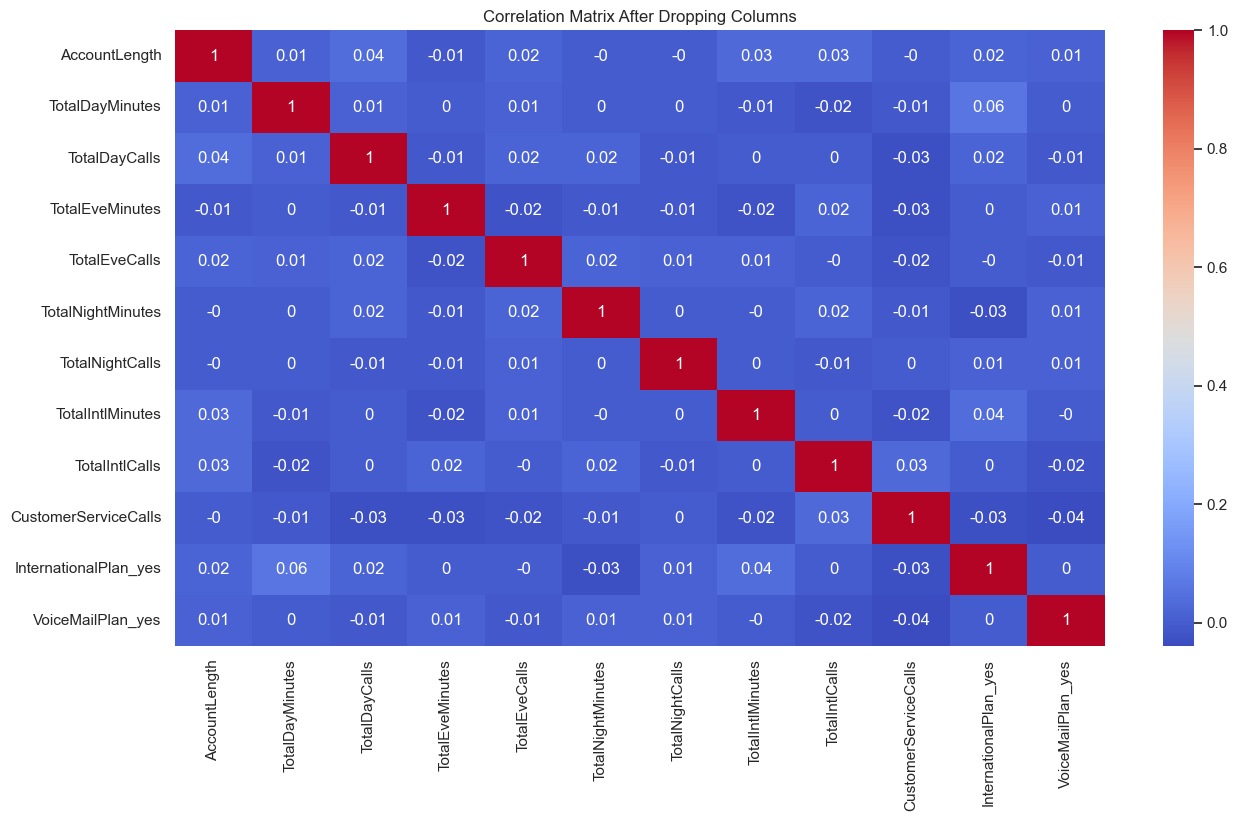

In [29]:
# List of columns to drop
col_to_drop = ['NumberVmailMessages', 'TotalDayCharge', 'TotalEveCharge', 'TotalNightCharge', 'TotalIntlCharge']

# Drop the columns from the DataFrame
corr_df = corr_matrix_columns.drop(columns=col_to_drop)

# Print the remaining columns in the DataFrame
print(corr_df.columns)

# Confirm multicollinearity as been eliminated


# Calculate the correlation matrix
corr_matrix1 = corr_df.corr().round(2)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Dropping Columns')
plt.show()

We no longer have features that are highly correlated and we can proceed to create the baseline logistic regression model.

#### 4.1.2 Standardize the features columns

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data1 into X an y
y = data1['Churn']
X = data1.drop(columns=['Churn','NumberVmailMessages', 'TotalDayCharge', 'TotalEveCharge', 'TotalNightCharge', 
                        'TotalIntlCharge'],axis=1)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Intitialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and test data 
X_train_standardized = scaler.fit_transform(X_train) 
X_test_standardized = scaler.transform(X_test)

# Retain feature names and concert back to DataFrame

X_train = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test = pd.DataFrame(X_test_standardized,columns=X_test.columns)



In [48]:
# Display first five columns of the Standardized X_train
X_train

,AccountLength,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,-0.260348,-1.953549,1.068323,1.796482,-1.419285,0.743572,-0.583165,0.180406,-0.642563,-1.321341,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
1,-2.030083,-0.876027,-0.348210,0.059342,0.042856,-0.950225,-1.155999,1.000783,1.292046,1.772279,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
2,-0.542480,-2.439006,-2.027065,-0.005522,-0.688215,-1.113011,1.083261,-2.397923,-0.158911,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
3,-0.234700,-0.375340,0.438753,1.082977,2.183849,-2.440025,-1.416378,-0.093053,-0.158911,-1.321341,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
4,1.227255,1.259981,2.589785,-1.696041,1.974972,0.725026,-0.479013,1.899292,-0.158911,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,5.462439,-0.142961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,-0.157755,-1.346253,-1.135173,0.815413,2.706042,1.056780,-0.426937,0.024144,-0.642563,1.772279,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
2093,0.611695,1.385629,-0.820388,0.253934,-0.113802,-0.303203,-1.520529,0.297603,0.808394,1.772279,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
2094,-1.081095,-0.683748,-0.243282,1.431621,-0.009363,-0.152781,0.250048,-0.561840,-0.158911,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
2095,-0.696370,0.298587,0.176432,-0.520381,-0.844873,0.603452,0.510427,0.453865,-0.642563,-1.321341,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961


In [49]:
# Display first five columns of the Standardized X_test
X_test

,AccountLength,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1.175958,0.037774,-0.977781,-0.567002,-0.531557,0.632300,-0.583165,-0.093053,-0.158911,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.149760,-0.159461,-0.183068,6.994896
1,0.303915,-0.192580,0.071503,1.952561,0.878366,-0.125993,0.510427,-0.210250,0.324741,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.149760,-0.159461,-0.183068,-0.142961
2,-0.362942,-0.712304,-1.502423,-0.960240,-0.270460,0.201639,-0.479013,-0.835299,0.324741,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.149760,-0.159461,-0.183068,-0.142961
3,-0.003865,0.664107,1.383109,-0.522408,-0.949311,0.131579,-0.010331,-0.561840,-0.642563,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.149760,-0.159461,-0.183068,-0.142961
4,0.150025,-1.133033,2.170072,0.541768,2.027191,-0.060055,-2.041287,-0.757168,2.259351,0.741072,...,-0.134019,7.566373,-0.139448,-0.153056,-0.167156,-0.14976,-0.149760,-0.159461,-0.183068,-0.142961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.670722,0.285261,-0.505603,0.900547,-0.218240,-1.294342,-0.426937,1.664898,-0.642563,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.149760,-0.159461,-0.183068,-0.142961
696,-0.850260,0.700279,0.071503,-0.222411,-0.270460,0.282002,0.302124,-0.679037,0.808394,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.149760,-0.159461,-0.183068,-0.142961
697,0.534750,0.013025,-1.607351,-1.189291,-0.374898,-1.741488,0.666655,0.336668,0.324741,-0.290134,...,7.461613,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.149760,-0.159461,-0.183068,-0.142961
698,1.099013,-0.348688,1.015859,1.707294,0.199514,-0.377384,-0.791468,-1.343152,-0.158911,1.772279,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,6.677347,-0.159461,-0.183068,-0.142961


Both the training and test features have been standardized inorder to make the model training and evaluation more reliable and effective. The two data sets have a 75.25 split.

### 4.2 Baseline Logistic Regression Model
Train and evaluate a Baseline Model using Accuracy score (May be misleading for this model due to class imbalance), the AUC (Area Under the Curve) and ROC Curve. The AUC score combination of the Precision and Recall scores.

Training Accuracy:  0.6409155937052933
Testing Accuracy:  0.5728571428571428
Train AUC: 0.8882301556970634
Test AUC: 0.8197085610200365


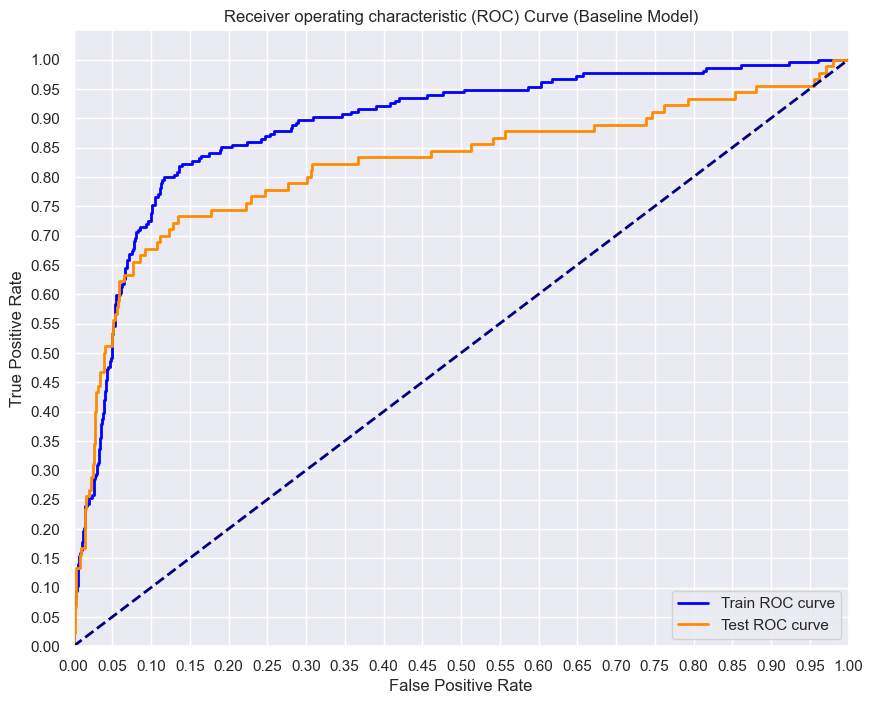

In [33]:
# import the necessary libaries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,auc,roc_auc_score


# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, solver='liblinear',C=1e12)

# Fit to training data
base_log_model = logreg.fit(X_train,y_train)

# Predict on train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict (X_test)

# Get Accuracy Score (This score may be misleading due to class imbalance)
print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

# Create the ROC Curve for both the train and test sets

# Calculate the probability scores of each point for the train and test sets
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

# Calculate the fpr(false positive rate),tpr(true positive rate) and thresholds for the train and test sets
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_score)

# Print the AUC for the train and test sets
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Plot the ROC curves for the train and test sets

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve (Baseline Model)')
plt.legend(loc='lower right')
plt.show()

                                                   

+ **Model Overfitting:** The high AUC scores compared to the lower accuracy scores suggest that the model may be overfitting the training data. This means it performs well in ranking predictions but not as well in making correct classifications.

+ **Class Imbalance**: The significant discrepancy between accuracy and AUC scores could be due to class imbalance. The model might be predicting the majority class more often, leading to lower accuracy but still achieving high AUC because it gets the ranking of probabilities right.

+ **Next Steps:** Addressing class imbalance and further tuning the model should help in improving both accuracy and AUC, leading to a more robust and reliable model.

### 4.3 Handle Class Imbalance with SMOTE

#### 4.3.1 Compare the Classes Before and After SMOTE

In [34]:
# Import the library
from imblearn.over_sampling import SMOTE

# Compare the classes before and after SMOTE
print('Original class distribution: \n')
print(y.value_counts())

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('SMOTE sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Churn
0    2493
1     304
Name: count, dtype: int64
-----------------------------------------
SMOTE sample class distribution: 

Churn
0    1883
1    1883
Name: count, dtype: int64


In [61]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(3766, 62)
(3766,)


#### 4.3.2 Train and Evaluate Logistic Regression Model on Oversampled Data

Training Accuracy:  0.7812002124269782
Testing Accuracy:  0.5628571428571428
Train Resampled AUC: 0.9224759983179575
Test AUC: 0.817832422586521


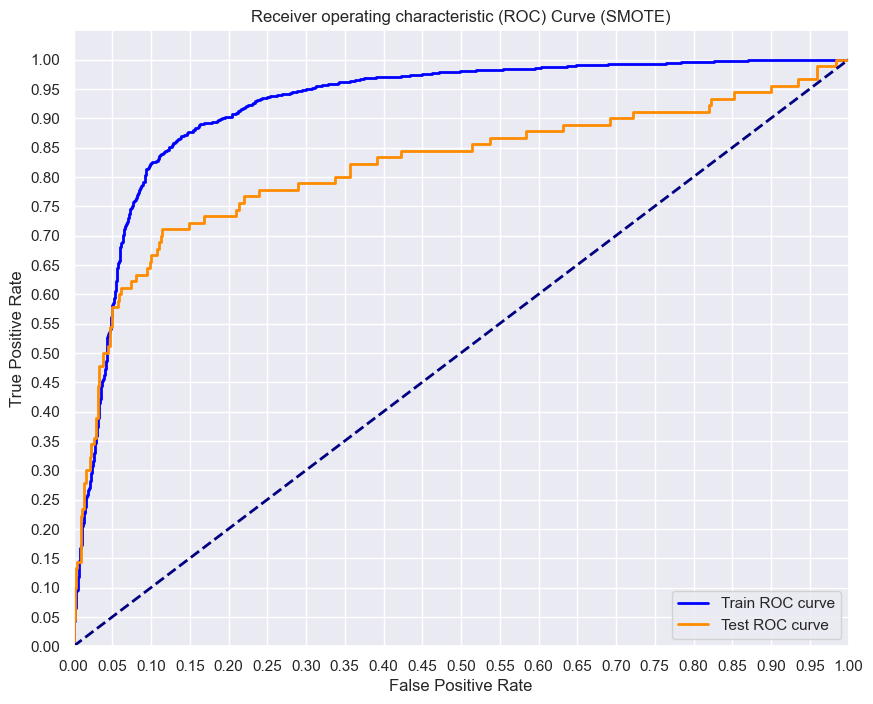

In [35]:
# Train logistic regression model on oversampled data

# Fit to training data
smote_log_model = logreg.fit(X_train_resampled,y_train_resampled)

# Predict on train and test sets
y_hat_train = logreg.predict(X_train_resampled)
y_hat_test = logreg.predict (X_test)

# Get Accuracy Score 
print('Training Accuracy: ', accuracy_score(y_train_resampled, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

# Create the ROC Curve for both the train and test sets

# Calculate the probability scores of each point for the train and test sets
y_train_score = logreg.decision_function(X_train_resampled)
y_test_score = logreg.decision_function(X_test)

# Calculate the fpr,tpr and thresholds for the train and test sets
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled,y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_score)

# Print the AUC for the train and test sets
print('Train Resampled AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Plot the ROC curves for the train and test sets

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve (SMOTE)')
plt.legend(loc='lower right')
plt.show()

#### 4.3.2 Compare the results of the baseline model with the oversampled SMOTE model

In [36]:

# Data for the models
data = {'Metric': ['Training Accuracy', 'Testing Accuracy', 'Train AUC', 'Test AUC'],
    'Baseline Model': [0.6409155937052933, 0.5728571428571428, 0.8882301556970634, 0.8197085610200365],
    'SMOTE Model': [0.7790759426447159, 0.56, 0.9243912819201007, 0.816775956284153]}

# Create a DataFrame
base_smote_df = pd.DataFrame(data)
base_smote_df


,Metric,Baseline Model,SMOTE Model
0,Training Accuracy,0.640916,0.779076
1,Testing Accuracy,0.572857,0.560000
2,Train AUC,0.888230,0.924391
3,Test AUC,0.819709,0.816776


+ **Training Improvement:** The model showed improved training accuracy and AUC after applying SMOTE, indicating better learning from the resampled data and improved discrimination power on the training set.

+ **Testing Performance:** The testing accuracy slightly decreased, and the test AUC remained relatively stable, suggesting that while the model became better at learning from the training data, it did not generalize as well to the test data.

+ **Conclusion :** The slight decrease in test performance indicates a potential overfitting due to the synthetic samples from SMOTE. Feature Selection, cross-validation, and Hyperparameter tuning techniques could help improve test performance.

### 4.4 Feature Selection with Random Forest

In this section, I will try to further optimize the model through feature selection using Random Forest.

+ Train Random Forest to determine feature importances
+ Select Top Features based on importances
+ Retrain Logistic Regression Model Using Selected Features

#### 4.4.1 Train Random Forest to Determine Feature Importances

In [37]:
# Import the Random Forest Clasifier 
from sklearn.ensemble import RandomForestClassifier 

# Train a Random Forest Model to calculate feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False) 
importance_df.head(12)


,Feature,Importance
1,TotalDayMinutes,0.222157
10,InternationalPlan_yes,0.154237
3,TotalEveMinutes,0.086652
11,VoiceMailPlan_yes,0.084933
9,CustomerServiceCalls,0.058062
8,TotalIntlCalls,0.056674
5,TotalNightMinutes,0.049246
7,TotalIntlMinutes,0.042258
2,TotalDayCalls,0.034859
0,AccountLength,0.033016


#### 4.4.2 Select Top Features Based on Importances

Top 5 Features
Train Accuracy: 0.7580987785448752
Test Accuracy: 0.5985714285714285
Train AUC: 0.8918514850005175
Test AUC: 0.817832422586521

Top 7 Features
Train Accuracy: 0.7588953797132236
Test Accuracy: 0.5842857142857143
Train AUC: 0.8974642164047665
Test AUC: 0.817832422586521

Top 10 Features
Train Accuracy: 0.7586298459904408
Test Accuracy: 0.59
Train AUC: 0.9015632786744692
Test AUC: 0.817832422586521

Top 12 Features
Train Accuracy: 0.7628783855549655
Test Accuracy: 0.5785714285714286
Train AUC: 0.902805632417282
Test AUC: 0.817832422586521

Top 20 Features
Train Accuracy: 0.772437599575146
Test Accuracy: 0.58
Train AUC: 0.9134498259717647
Test AUC: 0.817832422586521



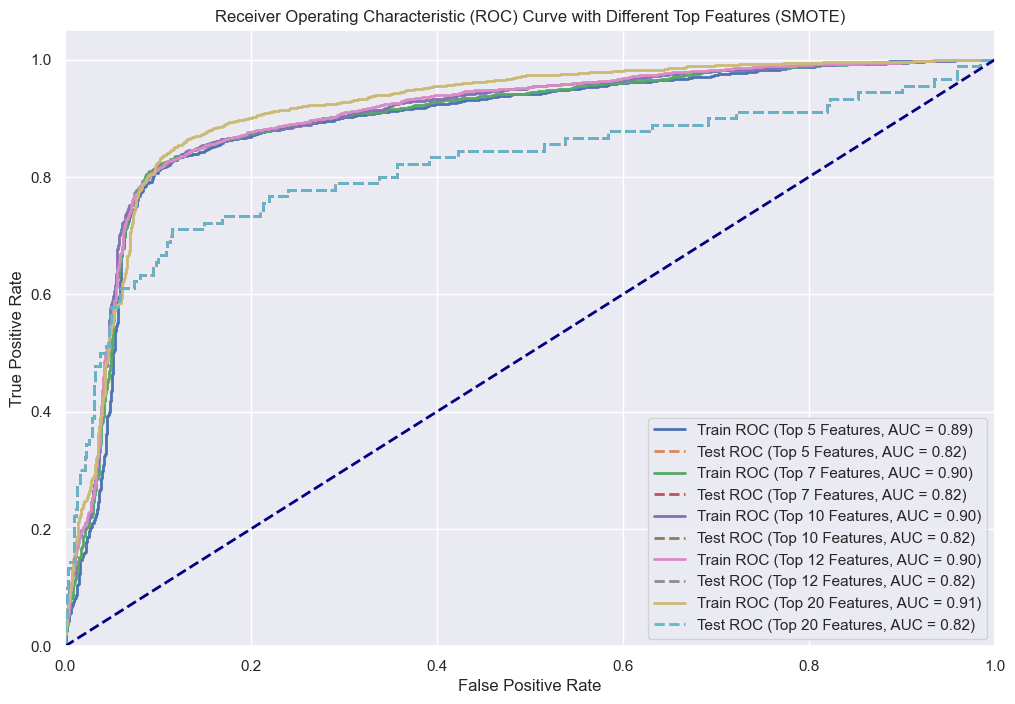

In [38]:
top_features_list = [5, 7,10,12,20]

# Define a function to evaluate models with different top features
def evaluate_model_with_top_features(top_features_count):
    top_features = importance_df['Feature'].head(top_features_count)
    X_train_top = X_train_resampled[top_features]
    X_test_top = X_test[top_features]
    
    # Train Logistic Regression model
    logreg.fit(X_train_top, y_train_resampled)
    
   # Calculate the probability scores of each point for the train and test sets
    y_train_score = logreg.decision_function(X_train_top)
    y_test_pred_proba = logreg.decision_function(X_test_top)
    
    # Calculate accuracy
    y_train_pred = logreg.predict(X_train_top)
    y_test_pred = logreg.predict(X_test_top)
    
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate ROC Curve
    train_fpr, train_tpr, _ = roc_curve(y_train_resampled, y_train_score)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_score)
    
    # Calculate AUC
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    
    
    
    return {
        'top_features': top_features_count,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_auc': train_auc,
        'test_auc': test_auc,
        'train_fpr': train_fpr,
        'train_tpr': train_tpr,
        'test_fpr': test_fpr,
        'test_tpr': test_tpr
    }

# Evaluate models
results = [evaluate_model_with_top_features(n) for n in top_features_list]

# Print results
for result in results:
    print(f"Top {result['top_features']} Features")
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print(f"Train AUC: {result['train_auc']}")
    print(f"Test AUC: {result['test_auc']}\n")

# Plot ROC Curves
plt.figure(figsize=(12, 8))
for result in results:
    plt.plot(result['train_fpr'], result['train_tpr'], lw=2, label=f"Train ROC (Top {result['top_features']} Features, AUC = {result['train_auc']:.2f})")
    plt.plot(result['test_fpr'], result['test_tpr'], lw=2, linestyle='--', label=f"Test ROC (Top {result['top_features']} Features, AUC = {result['test_auc']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Different Top Features (SMOTE)')
plt.legend(loc='lower right')
plt.show()


#### 4.4.3 Compare the results of the features against Baseline and SMOTE models

In [39]:
# Data for the models
data = {'Metric': ['Training Accuracy', 'Testing Accuracy', 'Train AUC', 'Test AUC'],
    'Baseline Model': [0.6409155937052933, 0.5728571428571428, 0.8882301556970634, 0.8197085610200365],
    'SMOTE Model': [0.7790759426447159, 0.56, 0.9243912819201007, 0.816775956284153],
    'Top 5 Features':[0.758364312267658, 0.5828571428571429,0.8948655677359182,0.816775956284153],
    'Top 7 Features':[0.7586298459904408,0.5857142857142857,0.8990342920656605,0.816775956284153],
    'Top 10 Features':[0.7636749867233139,0.5857142857142857,0.9048190633752707,0.816775956284153],
    'Top 12 Features': [0.7681890600106214, 0.5857142857142857,0.9059299899116927,0.816775956284153],  
    'Top 20 Features':[0.7721720658523632,0.5757142857142857,0.9134605432117707,0.816775956284153]}
    

# Create a DataFrame
base_smote_features_df = pd.DataFrame(data)
base_smote_features_df


,Metric,Baseline Model,SMOTE Model,Top 5 Features,Top 7 Features,Top 10 Features,Top 12 Features,Top 20 Features
0,Training Accuracy,0.640916,0.779076,0.758364,0.758630,0.763675,0.768189,0.772172
1,Testing Accuracy,0.572857,0.560000,0.582857,0.585714,0.585714,0.585714,0.575714
2,Train AUC,0.888230,0.924391,0.894866,0.899034,0.904819,0.905930,0.913461
3,Test AUC,0.819709,0.816776,0.816776,0.816776,0.816776,0.816776,0.816776


+ **Training Accuracy and AUC:** Selected features do not show any improvements from the SMOTE model
+ **Testing Performance:** Testing accuracy and AUC show minor improvements with selected features, but performance does not significantly change.
+ **Optimal Feature Selection:** Top 7 to 12 features offer a balance between improving model performance and avoiding overfitting.
+ **Next Steps:** I will subset the features to the top 12 and then perform cross-validation and Hyperparameter tuning to  optimize the model.

#### 4.4.3 Subset the X_train_resampled and X_test_resampled to the 12 top features

In [65]:
# Subset the top 12 best columns 
top_features_cols = ['AccountLength', 'TotalDayMinutes', 'TotalDayCalls', 'TotalEveMinutes',
       'TotalEveCalls', 'TotalNightMinutes', 'TotalNightCalls',
       'TotalIntlMinutes', 'TotalIntlCalls', 'CustomerServiceCalls',
       'InternationalPlan_yes', 'VoiceMailPlan_yes']

X_train_resampled= X_train_resampled[top_features_cols]
X_test = X_test[top_features_cols]

print(f"This X_train_resampled with top 12 best features data set consists of {X_train_top.shape[0]} rows")
print(f"This X_train_resampled with top 12 best features data set consists of {X_train_top.shape[1]} columns\n ")

print(f"This X_test with top 12 best features data set consists of {X_test_top.shape[0]} rows")
print(f"This X_test with top 12 best features data set consists of {X_test_top.shape[1]} columns")

This X_train_resampled with top 12 best features data set consists of 3766 rows
This X_train_resampled with top 12 best features data set consists of 12 columns
 
This X_test with top 12 best features data set consists of 700 rows
This X_test with top 12 best features data set consists of 12 columns


### 4.5 Cross-Validation

I will now perform cross-validation to assess how the model generalizes to an independent dataset. I will use the SMOTE resampled data with the top 12 best features

In [41]:
# # Import the necessary library
# from sklearn.model_selection import cross_validate

# # Define the number of folds and scoring metric
# cv_folds = 5
# scoring_metrics = {'accuracy':'accuracy', 'auc':'roc_auc'}

# # Perform cross-validation
# cv_results = cross_validate(logreg,X_train_resampled,y_train_resampled, cv=cv_folds, scoring=scoring_metrics, 
#             return_train_score=True)

# # Evaluate cross-validation

# # Evaluate cross-validation results with rounding print("Cross-Validation Results:") 
# for metric in scoring_metrics: 
#     train_scores = [round(score, 2) for score in cv_results['train_' + metric]] 
#     test_scores = [round(score, 2) for score in cv_results['test_' + metric]] 
#     mean_train_score = round(cv_results['train_' + metric].mean(), 2) 
#     mean_test_score = round(cv_results['test_' + metric].mean(), 2) 
#     std_train_score = round(cv_results['train_' + metric].std(), 2) 
#     std_test_score = round(cv_results['test_' + metric].std(), 2) 
    
#     print(f"{metric.capitalize()} - Train: {train_scores}") 
#     print(f"{metric.capitalize()} - Test: {test_scores}") 
#     print(f"Mean {metric.capitalize()} - Train: {mean_train_score}") 
#     print(f"Mean {metric.capitalize()} - Test: {mean_test_score}")
#     print(f"Standard Deviation {metric.capitalize()} - Train: {std_train_score}")
#     print(f"Standard Deviation {metric.capitalize()} - Test: {std_test_score}")
#     print()

**Accuracy:** The training and testing accuracies are relatively close, indicating the model does not significantly overfit or underfit the data. However the testing accuracy variability indicates that the model's performance can vary based on the data split.

**AUC:** Both training and test AUC values are high, showing the model's strong ability to distinguish between classes. The train results are quite consistent across folds while the variability in testing AUC suggests the need for careful interpretation.

Overall the results show that the model performs well and generalizes effectively across different folds.

### 4.6 Hyperparameter Tuning

Hyperparameter tuning will further optimize the model and potentially reduce variability in performance. I will use GridSearchCV for tuning the following hyperparameters:

+ **max_iter:** This parameter specifies the maximum number of iterations taken for the solvers to converge. Our models so far have use 100, the default value.
+ **C:** This is the inverse of the regularization strength; smaller values specify stronger regularization. Our models have used a very high value of C=1e12 (very small regularization). The default when not specified is 1.0.
+ **solver:** This parameter determines the algorithm to use in the optimization problem. In our models, we are using 'liblinear'. The default value when not specified is 'lbfgs'.
+ **penalty:** Ths parameter specifies the norm of the penalty. Our models so far, have used the deafaul L2 norm which is the Ridge Regularization.



#### 4.6.1 Tune the model to find the best hyperparameters

In [42]:
# # Import the necessary library
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler

# # Standardize the data (solvers can be sensitive to the scale of features)
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

# # Define the parameter grid
# param_grid = { 
#     'C': [0.01, 0.1, 1, 10, 100], 
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
#     'penalty': ['l2'], 
#     'fit_intercept':[True, False],
#     'max_iter': [100,200,300,500,1000]}

# # Initialize GridSearchCV with multiple scoring metrics 
# grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, 
#               cv=5, scoring=['accuracy', 'roc_auc'], refit='roc_auc', return_train_score=True)

# # Fit the model
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Evaluate the results
# best_params = grid_search.best_params_ 
# best_score = grid_search.best_score_ 
# print("Best Hyperparameters:", best_params) 
# print("Best AUC Score from Cross-Validation:", best_score)

# # Get results for both metrics
# results_df = pd.DataFrame(grid_search.cv_results_)
# accuracy_scores = results_df[results_df['mean_test_accuracy'].notnull()][['mean_test_accuracy','mean_test_roc_auc']]
# print("Grid Search Results for Accuracy and AUC:") 
# print(accuracy_scores)



#### 4.6.2 Retrain the model with the best parameters

In [43]:
# # Retrain the model with the best parameters

# best_model = LogisticRegression(random_state=42, **best_params)
# best_model.fit(X_train_resampled,y_train_resampled)

# # Predict on train and test sets
# y_hat_train = best_model.predict(X_train_resampled)
# y_hat_test = best_model.predict (X_test)

# # Get Accuracy Score 
# print('Training Accuracy: ', accuracy_score(y_train_resampled, y_hat_train))
# print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

# # Calculate the probability scores of each point for the train and test sets
# y_train_score = best_model.decision_function(X_train_resampled)
# y_test_score = best_model.decision_function(X_test)

# # Calculate the fpr,tpr and thresholds for the train and test sets
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled,y_train_score)
# test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_score)

# # Print the AUC for the train and test sets
# print('Train Resampled AUC: {}'.format(auc(train_fpr, train_tpr)))
# print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# # Plot the ROC curve
# plt.figure(figsize=(10, 8))
# lw = 2

# plt.plot(train_fpr, train_tpr, color='blue',
#          lw=lw, label='Train ROC curve')
# plt.plot(test_fpr, test_tpr, color='darkorange',
#          lw=lw, label='Test ROC curve')

# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.yticks([i/20.0 for i in range(21)])
# plt.xticks([i/20.0 for i in range(21)])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic (ROC) Curve (BEST MODEL)')
# plt.legend(loc='lower right')
# plt.show()

#### 4.6.3 Analyze the hyperparameter Tuning Results

I will compare the tuned model with the SMOTE model using all features.

In [44]:
# # Create a Data Frame of bot sets of scores for better analysis

# data = { 'Metric': ['Training Accuracy', 'Testing Accuracy', 'Train Resampled AUC', 'Test AUC'],
#         'SMOTE Scores': [0.7796070100902814, 0.74, 0.8560079578327371, 0.7560655737704919], 
#         'Tuned Scores': [0.80323951141795, 0.7685714285714286, 0.8783934518791693, 0.7796539162112932] }
# Analysis_df = pd.DataFrame(data)
# Analysis_df

All metrics improved after hyperparameter tuning, which suggests that the runing process successfully enhanced the model's performance. Both the testing accuracy and test AUC improvements indicate better generalization to new data, reducing the risk of overfitting. The improvements are consistent accross both training and testing datasets, which is a positive sign that the model's enhancements are not just resticted to training data.

### 4.7 A Different Modeling Algorithm - Decision Trees

I will tune the following parameters to get the best Decision Tree Model:
+ **criterion:** This function measures the quality of a split. The default is 'gini' for the Gini impurity and 'entropy' for the information gain.
+ **splitter:** This is the strategy used to chose the split at each node. I will assess 'best' that chooses the best split and 'random' that chooses the best random split. The default is 'best'
+ **max_depth:** The maximum depth of a tree. If None, the nodes are expanded until all leaves are pure or until leaves contain less than min_samples_split samples
+ **min_samples_split:** The minimum number of samples required to split an internal node. Default is 2.
+ **min_samples_leaf:** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. Default is 1

#### 4.7.1 Tune the Decision Tree model to find the best parameters

In [45]:
# # Import necessary libraries
# from sklearn.tree import DecisionTreeClassifier

# # Define the hyperparameters for tuning the Decision Tree
# param_grid = {
#     'criterion': ['gini','entropy'],
#     'splitter': ['best','random'],
#     'max_depth': [None,10,20,30,40,50],
#     'min_samples_split': [2,5,10],
#     'min_samples_leaf': [1,2,4]}

# # Use GridSerachCV to search over the defined parameter grid
# tree_clf = DecisionTreeClassifier(random_state=42)
# grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring=['accuracy', 'roc_auc'], 
#                 refit='roc_auc', return_train_score=True)

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Extract the best parameters and evaluate the model's performance
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print("Best Hyperparameters for Decision Tree:", best_params)
# print("Best AUC Score from Cross-Validation for Decision Tree:", best_score)

# # Get results for both metrics
# results_df = pd.DataFrame(grid_search.cv_results_)
# accuracy_scores = results_df[['mean_test_accuracy', 'mean_test_roc_auc']]
# print("Grid Search Results for Accuracy and AUC:")
# print(accuracy_scores)


#### 4.7.2 Retrain the model with the best parameters

In [46]:
# # Retrain the model with the best parameters
# best_model_tree = DecisionTreeClassifier(random_state=42, **best_params)
# best_model_tree.fit(X_train_resampled, y_train_resampled)


# # Calculate the probability scores of each point for the train and test sets
# y_train_score_tree = best_model_tree.predict_proba(X_train_resampled)[:,1]
# y_train_pred = best_model_tree.predict(X_train_resampled)
# y_test_score_tree = best_model_tree.predict_proba(X_test)[:,1]
# y_test_pred = best_model_tree.predict(X_test)

# # Calculate AUC and accuracy
# train_auc =roc_auc_score(y_train_resampled,y_train_score_tree)
# test_auc = roc_auc_score(y_test, y_test_score_tree) 
# train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred) 
# print("Train AUC:", round(train_auc, 2))
# print("Test AUC:", round(test_auc, 2)) 
# print("Train Accuracy:", round(train_accuracy, 2))
# print("Test Accuracy:", round(test_accuracy, 2))

# # Calculate the fpr,tpr and thresholds for the train and test sets
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled,y_train_score_tree)
# test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_score_tree)

# # Print the AUC for the train and test sets
# print('Train Resampled AUC: {}'.format(auc(train_fpr, train_tpr)))
# print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# # Plot the ROC curve
# plt.figure(figsize=(10, 8))
# lw = 2

# plt.plot(train_fpr, train_tpr, color='blue',
#          lw=lw, label='Train ROC curve')
# plt.plot(test_fpr, test_tpr, color='darkorange',
#          lw=lw, label='Test ROC curve')

# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.yticks([i/20.0 for i in range(21)])
# plt.xticks([i/20.0 for i in range(21)])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic (ROC) Curve (BEST MODEL DECISION TREE)')
# plt.legend(loc='lower right')
# plt.show()

#### 4.7.3 Analyze the Decsion Tree results

I will compare the tuned Decision Tree Model results with the Best Logistic Model.

In [47]:
# # Data for the models
# data = {
#     'Metric': ['Training Accuracy', 'Testing Accuracy', 'Train Resampled AUC', 'Test AUC'],
#     'Decision Tree': [0.89, 0.88, 0.97319604172842, 0.8244444444444443],
#     'Logistic Regression Best Model': [0.8154540626659585, 0.7785714285714286, 0.8880714016373122, 0.785464480874317]
# }

# # Create a DataFrame
# final_model_analysis = pd.DataFrame(data)
# final_model_analysis


+ **Decision Tree Model:** Higher training and testing accuracy, and higher AUC scores on both training and test sets.The very high training scores suggest the model might be overfitting. The big difference between the train and test AUC is indicative of a train model that is not generalizing as well to the unseen data.

+ **Best Logistic Regression Model:** Shows more stable performance with less risk of overfitting, as indicated by the closer alignment between training and testing metrics. It has lower accuracy and AUC scores compared to the Decision Tree.

 **Conclusion**   
The Decision Tree currently performs better in terms of accuracy and AUC on both the training and test sets. However, the risk of overfitting in the Decision Tree suggests that this model should be used with caution.  Logistic Regression, while showing lower metrics, provides a more balanced model with less overfitting risk.

### 6.0 Summary and Recomendations